# Machine Learning Project (By: Kaustuv Mishra)
## Project : Music Genre Classification – Automatically classify different musical genres

We'll build a deep learning project to automatically identify various musical subgenres from audio samples. These audio recordings will be categorised based on their low-level frequency and time domain characteristics. 

We require a collection of audio tracks with a similar size and frequency range for this project. The GTZAN genre classification dataset, which was solely compiled for this work, is the most suggested dataset for the music genre classification project.

## Regarding the dataset:
The data for the GTZAN genre collection was gathered in 2000–2001. There are 1000 audio files total, each lasting 30 seconds. Each class has 100 audio tracks and consists of 10 different music genres. Each track has in.wav file extension. It includes audio tracks from the 10 genres listed below:
- Blues
- Classical
- Country
- Disco
- Hiphop 
- Jazz
- Metal
- Pop
- Reggae
- Rock

## Approach to Classifying Music Genres:
There are several techniques for classifying this dataset. Several of these strategies include:
- Multiclass support vector machines
- K-means clustering
- K-nearest neighbors
- Convolutional neural networks

Popular machine learning algorithms for regression and classification include K-Nearest Neighbors. Based on the distance between the data points and other similarity metrics, it creates predictions about the data points.

## Feature Extraction:

The initial stage in a project to classify music genres would be to extract features and components from the audio files. Identification of the language content and the elimination of noise are included.

## Cepstral Coefficients for Mel Frequencies:
These cutting-edge traits are employed in investigations of automatic speech and voice recognition. The following steps are involved in the production of these features:
- We initially break the audio signals into smaller frames because they are continually changing. A frame lasts 20 to 40 milliseconds.
- Next, we try to determine which frequencies are present in each frame.
- Now extract the noise from the linguistic frequencies.
- Then, it performs a discrete cosine transform (DCT) on these frequencies to remove the noise. We only retain a certain sequence of frequencies with a high likelihood of information using DCT.

In [1]:
# Importing Packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Tools for analysis
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading the dataset into pandas data frame
data =pd.read_csv(r'C:\Users\ASUS\Downloads\music.csv', header=None)

# Seprating the metadata and the labels (which is the last column)
metadata_pd = data.iloc[:,1:]
label_pd = data.iloc[:,0]

# Converting the datatypes to numpy
metadata = metadata_pd.to_numpy()
label = label_pd.to_numpy()

#Standardizing the dataset
standardized_metadata = StandardScaler().fit_transform(metadata)

In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,228,229,230,231,232,233,234,235,236,237
0,Hip-Hop,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661,0.388990,...,-1.992303,6.805694,0.233070,0.192880,0.027455,0.06408,3.67696,3.61288,13.316690,262.929749
1,Hip-Hop,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240,0.388990,...,-1.582331,8.889308,0.258464,0.220905,0.081368,0.06413,6.08277,6.01864,16.673548,325.581085
2,Hip-Hop,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661,0.388990,...,-2.288358,11.527109,0.256821,0.237820,0.060122,0.06014,5.92649,5.86635,16.013849,356.755737
3,Hip-Hop,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072,0.388990,...,-1.452696,2.356398,0.234686,0.199550,0.149332,0.06440,11.26707,11.20267,26.454180,751.147705
4,Folk,0.106550,0.260911,0.607067,0.835087,0.223676,0.030569,196.961,0.160267,0.388923,...,-3.078667,12.411567,0.270802,0.272700,0.025242,0.06404,2.43669,2.37265,3.897095,37.866043


In [4]:
# Function used for cross validation.
def cross_val(clf, K, metadata, label, title, return_clf = False):
    # scores is used to give average of accuracy
    scores = []
    cv = KFold(n_splits=K)
    
    # K fold analysis, used for spliting the data into k batches
    for train_index, test_index in cv.split(metadata):
      
        X_train, y_train = metadata[train_index], label[train_index]
        X_test, y_test = metadata[test_index], label[test_index]

        clf.fit(X_train, y_train)
        scores.append(clf.score(X_test, y_test))
    
    # Display the average score
    print(title + " Cross-Validation Accuracy Score: ", round(np.mean(scores), 2))
    
    # returns the classifier if needed
    if(return_clf == True):
        return clf

# Function used for parameter tuning.
def parameter_tuning(clf, metadata, label, param_grid):
  # Initialising grid search
  grid = GridSearchCV(estimator=clf,
                      param_grid=param_grid,
                      scoring='accuracy',
                      verbose=2,
                      cv = 2,
                      n_jobs=-1
                      )
  
  # Inputing the data onto the grid search
  grid_result = grid.fit(metadata, label)

  # Displaying the best score with its corrsponding parameters
  print('Best Score: ', grid_result.best_score_)
  print('Best Params: ', grid_result.best_params_)

# Function used for displaying confusion matrix.
def display_confusionMatrix(clf, X, y, title):
  cm = confusion_matrix(y, clf.predict(X), labels=clf.classes_)
  normed_c = (cm.T / cm.astype(np.float).sum(axis=1)).T
  disp = ConfusionMatrixDisplay(confusion_matrix=normed_c,
                                display_labels=clf.classes_)
  disp.plot(
      cmap=plt.cm.Blues
      )
  disp.ax_.set_title(title + " Confusion Matrix:")

In [5]:
# Different types of classifiers. 
#------------------------------------------------------------------------------#
# Classifier Random Forest
classifier_rf = RandomForestClassifier()
title_rf = "Random Forest"

#------------------------------------------------------------------------------#
# Classifier Decision Tree
classifier_dt = DecisionTreeClassifier()
title_dt = "Decision Tree"

#------------------------------------------------------------------------------#
# Classifier Support Vector Machine with Kernal as 'rbf' (SVC)
classifier_svc = SVC(max_iter=-1)
title_svc = "Support Vector Machine"

#------------------------------------------------------------------------------#
# Classifier K-Nearest Neighbors (KN)
classifier_kn = KNeighborsClassifier(70)
title_kn = "K-Nearest Neighbors"

#------------------------------------------------------------------------------#
# Classifier Naive Bayes (NB)
classifier_nb = GaussianNB()
title_nb = "Naive Bayes"

#------------------------------------------------------------------------------#
# Classifier Multi-Layer-Perceptron (MLP)
classifier_mlp = MLPClassifier(
    hidden_layer_sizes=100
    , activation="logistic"
    , solver="sgd"
    , max_iter=1000
    )
title_mlp = "Multi-Layer-Perceptron"

#------------------------------------------------------------------------------#
# List of classifiers
classifiers = [
               classifier_dt
               , classifier_kn
               , classifier_mlp
               , classifier_nb
               , classifier_rf
               , classifier_svc
]

# List of titles
titles = [
          title_dt
          , title_kn
          , title_mlp
          , title_nb
          , title_rf
          , title_svc
]

<Figure size 640x480 with 0 Axes>

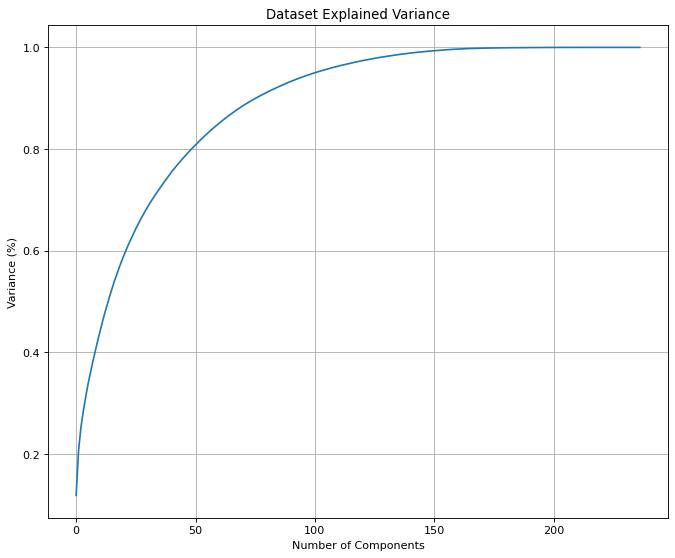

In [6]:
#Fitting the PCA algorithm with the Data
pca = PCA().fit(standardized_metadata)

#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.figure(figsize=(10, 8), dpi=80)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Dataset Explained Variance')
plt.grid()
plt.show()

In [7]:
# Using 70 number of components for dataset
# which is indicated from the above graph.

# Fitting the standardised data with 70 number of components
pca = PCA(n_components = 70)
pca_metadata = pca.fit_transform(standardized_metadata)

In [8]:
# Splitting the reduced dataset using pca
# into training and testing dataset.
X_train, X_test, y_train, y_test = train_test_split(
      pca_metadata 
      , label 
      , test_size=0.3
      , random_state=42
      , shuffle=True
      )

In [9]:
# Fitting training data on-to the classifiers
for clf, title in zip(classifiers, titles):
  clf.fit(X_train, y_train)
  print(title + " Accuracy Score:", round(clf.score(X_test, y_test), 2))

Decision Tree Accuracy Score: 0.6
K-Nearest Neighbors Accuracy Score: 0.71
Multi-Layer-Perceptron Accuracy Score: 0.8
Naive Bayes Accuracy Score: 0.57
Random Forest Accuracy Score: 0.74
Support Vector Machine Accuracy Score: 0.8


In [10]:
# Fitting data on-to the classifiers using cross-validation
for clf, title in zip(classifiers, titles):
  cross_val(clf, 5, pca_metadata, label, title, return_clf = False)

Decision Tree Cross-Validation Accuracy Score:  0.56
K-Nearest Neighbors Cross-Validation Accuracy Score:  0.69
Multi-Layer-Perceptron Cross-Validation Accuracy Score:  0.76
Naive Bayes Cross-Validation Accuracy Score:  0.53
Random Forest Cross-Validation Accuracy Score:  0.7
Support Vector Machine Cross-Validation Accuracy Score:  0.76


In [11]:
# Classification reports of the best classifiers

# MLP
print(title_mlp + " Classification Report:")
print(classification_report(y_test, classifier_mlp.predict(X_test)))

# SVC
print(title_svc + " Classification Report:")
print(classification_report(y_test, classifier_svc.predict(X_test)))

Multi-Layer-Perceptron Classification Report:
              precision    recall  f1-score   support

        Folk       0.71      0.73      0.72       263
        Rock       0.89      0.88      0.88      1193
   Classical       0.89      0.93      0.91        72
  Electronic       0.80      0.85      0.82       629
     Hip-Hop       0.83      0.72      0.77       277

    accuracy                           0.84      2434
   macro avg       0.82      0.82      0.82      2434
weighted avg       0.84      0.84      0.84      2434

Support Vector Machine Classification Report:
              precision    recall  f1-score   support

        Folk       0.81      0.76      0.79       263
        Rock       0.91      0.91      0.91      1193
   Classical       0.97      0.89      0.93        72
  Electronic       0.82      0.91      0.86       629
     Hip-Hop       0.89      0.76      0.82       277

    accuracy                           0.88      2434
   macro avg       0.88      0.85      

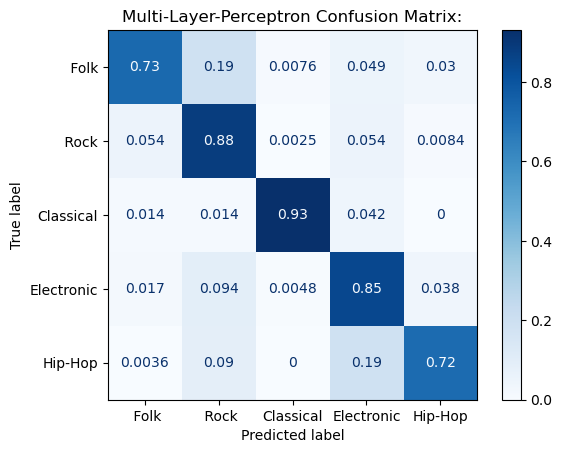

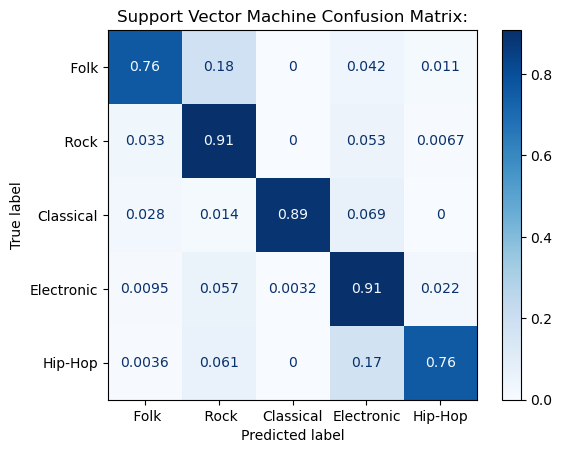

In [12]:
# Confusion Matrix of the best classifiers.

# MLP
display_confusionMatrix(classifier_mlp, X_test, y_test, title_mlp)

# SVC
display_confusionMatrix(classifier_svc, X_test, y_test, title_svc)